El dataset ofrece diferntes variables para poder predecir que tan propenso se es a tener un "Stroke" o mejor conocido, ataque cerebrovascular. Entre las variables con las que se cuenta se tienen datos de enfermedades de la persona (si tiene problemas de corazón o no y si tiene hipertensión), de igual manera, se proporciona un dato para saber si ya ha presentado ataques cerebrovasculares.(COMPLEMENTAR)

##Preprocesamiento 


In [12]:
##Se importan las librerias a utilizar
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

In [13]:
## Cargamos el dataset
df = pd.read_csv('Data/healthcare-dataset-stroke-data.csv')

##Visualizar la cantidad de registros y columnas del dataset
print(f"El dataset tiene {df.shape}")

##Visualizar las primeras filas del dataset
print(f"Primeras filas del dataset:\n{df.head(10)}")




El dataset tiene (5110, 12)
Primeras filas del dataset:
      id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   
5  56669    Male  81.0             0              0          Yes   
6  53882    Male  74.0             1              1          Yes   
7  10434  Female  69.0             0              0           No   
8  27419  Female  59.0             0              0          Yes   
9  60491  Female  78.0             0              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural          

In [14]:

##Visualizar las estadísticas descriptivas del dataset
print("---------------------------------------------")
print(f"Estadísticas descriptivas del dataset:\n{df.describe()}")


---------------------------------------------
Estadísticas descriptivas del dataset:
                 id          age  hypertension  heart_disease  \
count   5110.000000  5110.000000   5110.000000    5110.000000   
mean   36517.829354    43.226614      0.097456       0.054012   
std    21161.721625    22.612647      0.296607       0.226063   
min       67.000000     0.080000      0.000000       0.000000   
25%    17741.250000    25.000000      0.000000       0.000000   
50%    36932.000000    45.000000      0.000000       0.000000   
75%    54682.000000    61.000000      0.000000       0.000000   
max    72940.000000    82.000000      1.000000       1.000000   

       avg_glucose_level          bmi       stroke  
count        5110.000000  4909.000000  5110.000000  
mean          106.147677    28.893237     0.048728  
std            45.283560     7.854067     0.215320  
min            55.120000    10.300000     0.000000  
25%            77.245000    23.500000     0.000000  
50%        

In [15]:

##Validamos datos nulos y duplicados
print(f"Datos nulos:\n{df.isnull().mean()*100}")

print("---------------------------------------------")
print(f"Datos duplicados:\n{df.duplicated().sum()}")



Datos nulos:
id                   0.000000
gender               0.000000
age                  0.000000
hypertension         0.000000
heart_disease        0.000000
ever_married         0.000000
work_type            0.000000
Residence_type       0.000000
avg_glucose_level    0.000000
bmi                  3.933464
smoking_status       0.000000
stroke               0.000000
dtype: float64
---------------------------------------------
Datos duplicados:
0


GRAFICAS GENERALES DE HISTOGRAMA PARA VER DISTRIBUCION DE DATOS

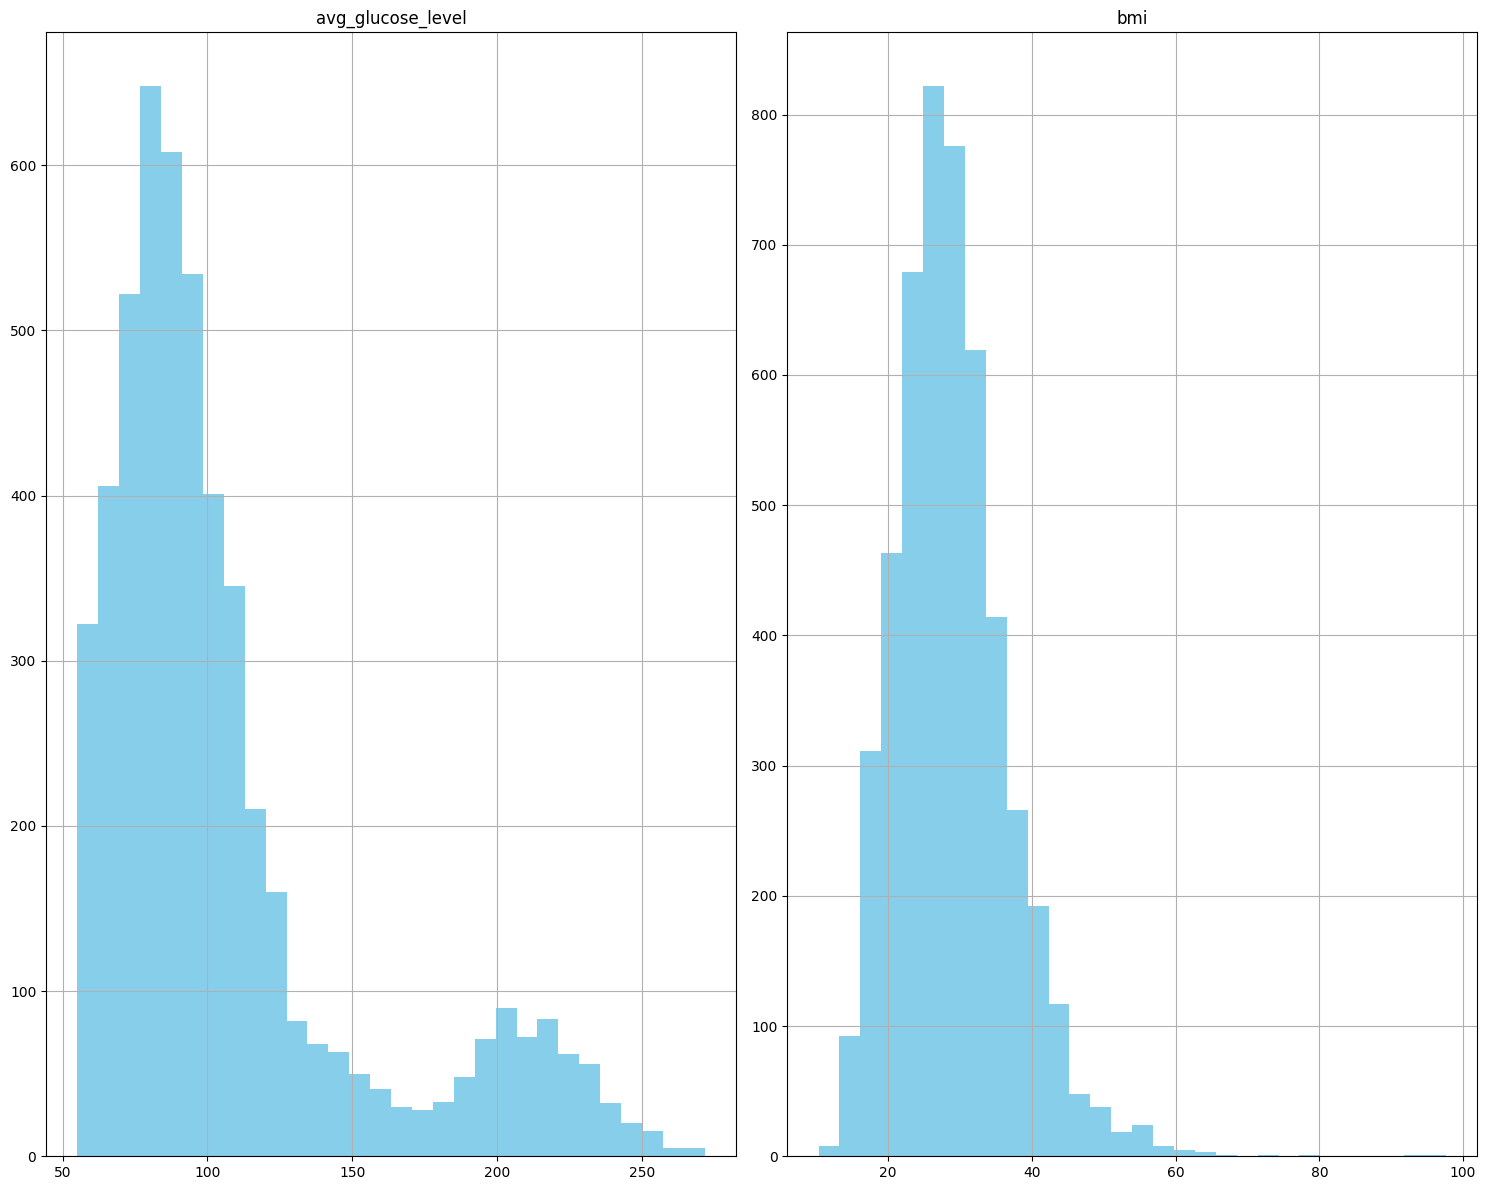

In [16]:
##Se exploran otras variables numericas mediante histograma con el fin de saber como estan distribuidos los datos

##REEMPLAZAR VARIABLES 
numeric_cols = ['avg_glucose_level', 'bmi']

df[numeric_cols].hist(bins=30, figsize=(15,12), color='skyblue')
plt.tight_layout()
plt.show()

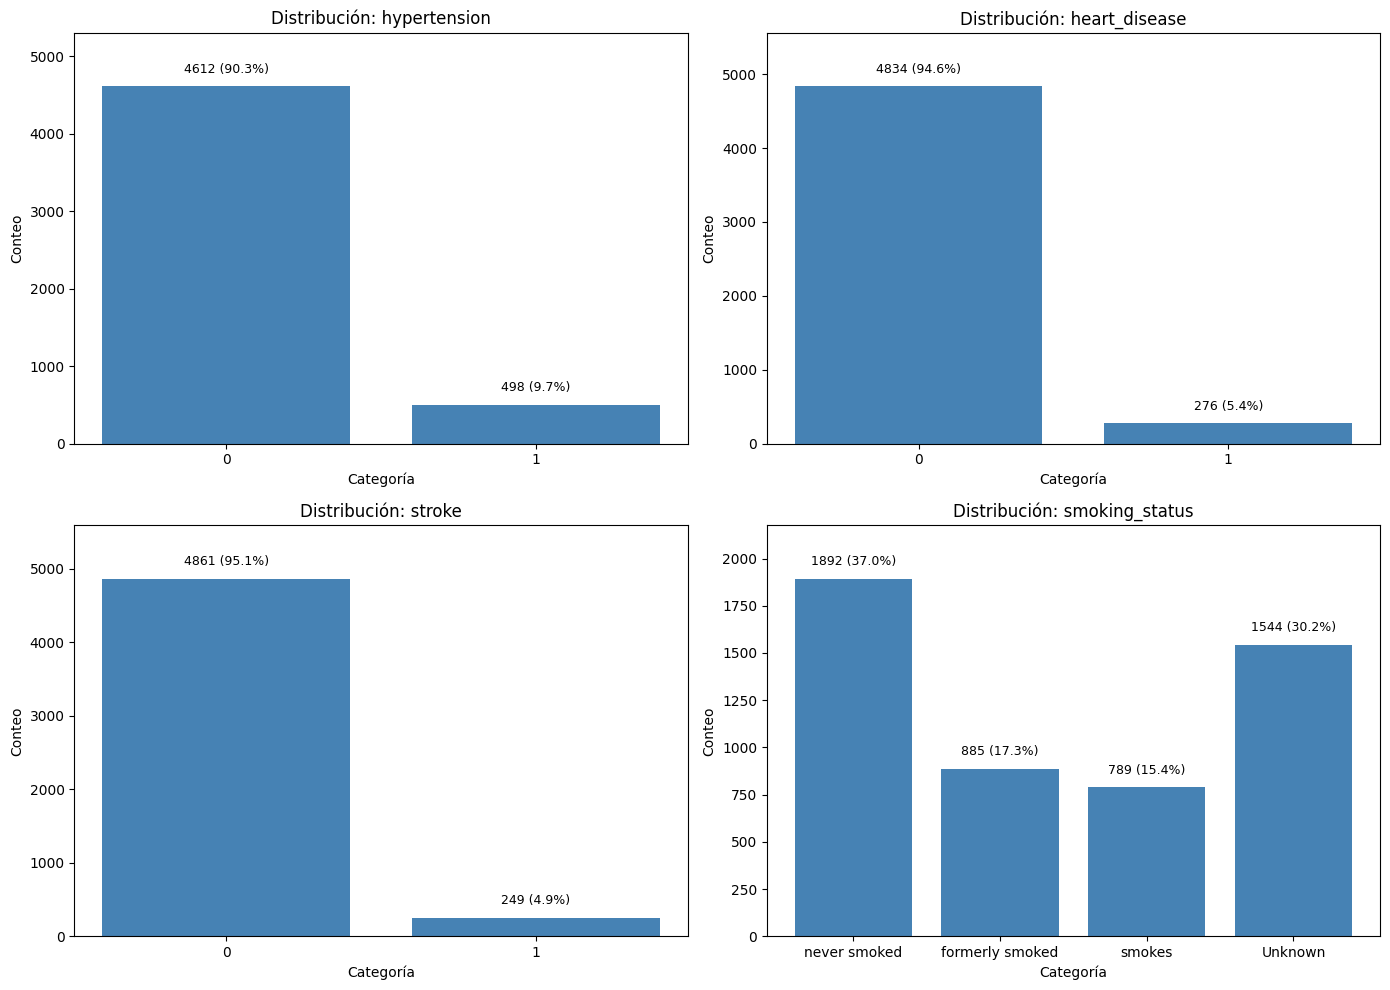


--- hypertension ---
              conteo  porcentaje
hypertension                    
0               4612       90.25
1                498        9.75

--- heart_disease ---
               conteo  porcentaje
heart_disease                    
0                4834        94.6
1                 276         5.4

--- stroke ---
        conteo  porcentaje
stroke                    
0         4861       95.13
1          249        4.87

--- smoking_status ---
                 conteo  porcentaje
smoking_status                     
never smoked       1892       37.03
Unknown            1544       30.22
formerly smoked     885       17.32
smokes              789       15.44


In [17]:
# Conteos y gráficas de variables categóricas solicitadas


# Columnas categóricas a analizar
cat_cols = ['hypertension', 'heart_disease', 'stroke', 'smoking_status']

# Asegurar que 'smoking_status' tenga una categoría para faltantes
if 'smoking_status' in df.columns:
    df['smoking_status'] = df['smoking_status'].fillna('Unknown')


def plot_counts(df, columns):
    total = len(df)
    n = len(columns)
    rows = math.ceil(n / 2)
    cols = 2 if n > 1 else 1

    fig, axes = plt.subplots(rows, cols, figsize=(14, 5 * rows))
    if isinstance(axes, np.ndarray):
        axes = axes.ravel()
    else:
        axes = [axes]

    for i, col in enumerate(columns):
        s = df[col].copy()
        # Contar incluyendo valores faltantes (si existieran)
        counts = s.value_counts(dropna=False)

        # Orden sugerido para binarios y para 'smoking_status'
        if col in ['hypertension', 'heart_disease', 'stroke']:
            order = [0, 1]
            counts = counts.reindex(order).fillna(0).astype(int)
            xlabels = [str(x) for x in order]
        elif col == 'smoking_status':
            order = ['never smoked', 'formerly smoked', 'smokes', 'Unknown']
            counts = counts.reindex(order).fillna(0).astype(int)
            xlabels = order
        else:
            xlabels = counts.index.astype(str).tolist()

        ax = axes[i]
        bars = ax.bar(xlabels, counts.values, color='steelblue')
        ax.set_title(f'Distribución: {col}')
        ax.set_ylabel('Conteo')
        ax.set_xlabel('Categoría')
        ax.set_ylim(0, max(counts.values) * 1.15 if len(counts) else 1)

        for bar, val in zip(bars, counts.values):
            pct = (val / total * 100) if total else 0
            ax.text(
                bar.get_x() + bar.get_width() / 2,
                bar.get_height() + (max(counts.values) * 0.03 if len(counts) else 0.5),
                f'{val} ({pct:.1f}%)',
                ha='center', va='bottom', fontsize=9
            )

    # Eliminar ejes vacíos si sobran
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

    # Imprimir tablas de conteo y porcentaje
    for col in columns:
        s = df[col].copy()
        tbl = s.value_counts(dropna=False).to_frame('conteo')
        tbl['porcentaje'] = (tbl['conteo'] / total * 100).round(2)
        print(f'\n--- {col} ---')
        print(tbl)


# Ejecutar la función para las columnas solicitadas
plot_counts(df, cat_cols)

AQUI PONER ANALISIS DE LAS GRAFICAS OBTENIDAS

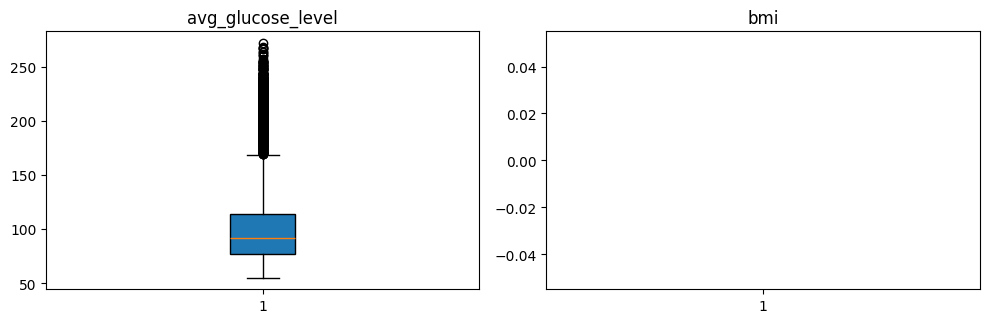

In [20]:
##BOXPLOT DE LAS VARIABLES A UTILIZAR
# Crear subplots
plt.figure(figsize=(15, 12))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(4, 3, i)  # 4 filas, 3 columnas
    plt.boxplot(df[col], vert=True, patch_artist=True)
    plt.title(col)

plt.tight_layout()
plt.show()

Para el caso de las variables numericas, se evidencia una gran cantidad de valores extremos en el nivel de glucosa y por otra parte, al tener datos nulos, la columna BMI no gráfica Boxplot, por lo que se tendrá que decidir si eliminar registro o imputar datos.

## Detección de anomalías en variables categóricas
## Revisar
- Utilizar Chi-cuadrado para analizar anomalos
- Estrategias:
  - Frecuencias: identificar categorías con muy bajo soporte (p.ej., < 1%).
  - Chi-cuadrado vs. variable objetivo: residuales estandarizados altos |residual| > 2 señalan celdas inusuales.
  - Limpieza: unificar mayúsculas/minúsculas, trim espacios, mapear faltantes a “Unknown” y agrupar raras en “Other”.
- Heatmap de residuales


[Frecuencias bajas] hypertension (umbral 1.0%):
- Sin categorías raras

[Frecuencias bajas] heart_disease (umbral 1.0%):
- Sin categorías raras

[Frecuencias bajas] smoking_status (umbral 1.0%):
- Sin categorías raras

[Chi-cuadrado] hypertension vs stroke: chi2=81.61, dof=1, p=1.662e-19


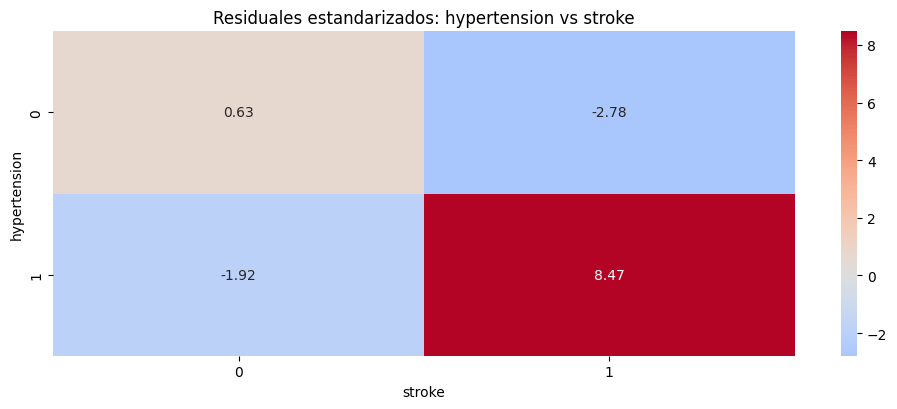


[Chi-cuadrado] heart_disease vs stroke: chi2=90.26, dof=1, p=2.089e-21


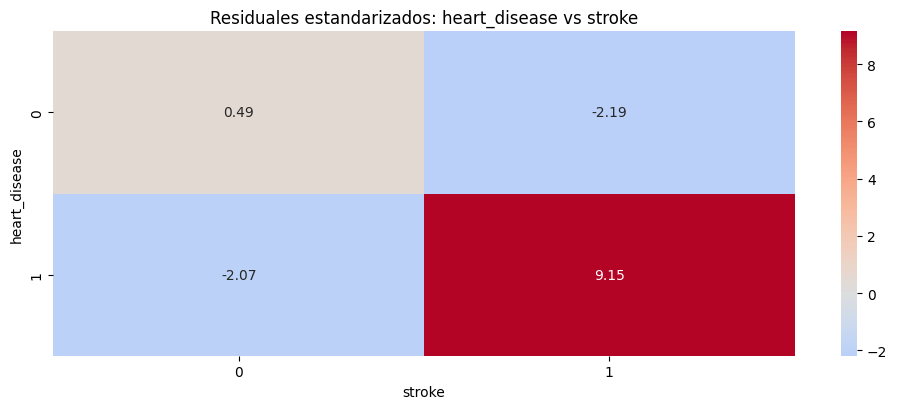


[Chi-cuadrado] smoking_status vs stroke: chi2=29.15, dof=3, p=2.085e-06


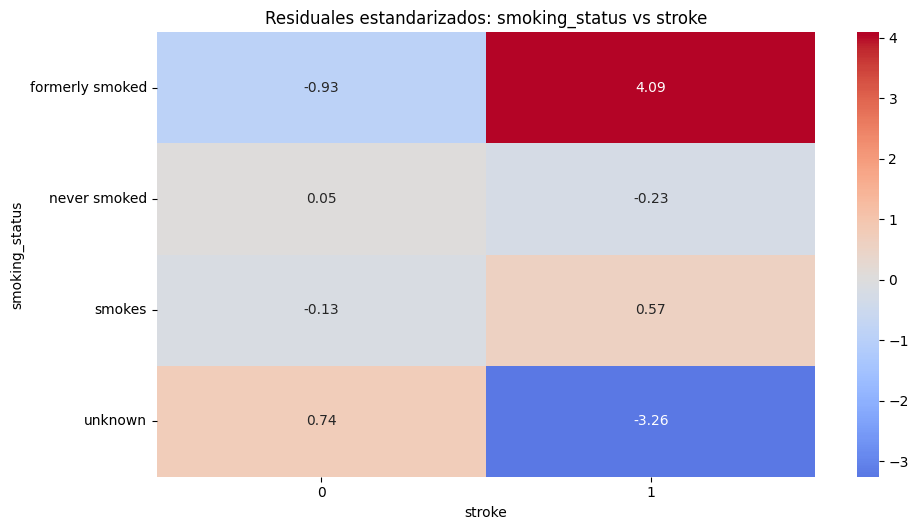

In [19]:


# Asegurar limpieza básica en smoking_status
if 'smoking_status' in df.columns:
    df['smoking_status'] = (
        df['smoking_status']
        .astype('string')
        .str.strip()
        .str.lower()
        .fillna('unknown')
        .replace({'nan': 'unknown', '': 'unknown'})
    )

cat_cols_to_check = ['hypertension', 'heart_disease', 'smoking_status']
if 'stroke' in df.columns:
    target = 'stroke'
else:
    target = None

# 1) Categorías raras por columna (soporte mínimo)
min_support = 0.01  # 1%
rare_report = {}
for col in cat_cols_to_check:
    counts = df[col].value_counts(dropna=False)
    pct = counts / len(df)
    rare = pct[pct < min_support]
    rare_report[col] = rare
    print(f"\n[Frecuencias bajas] {col} (umbral {min_support*100:.1f}%):")
    if rare.empty:
        print("- Sin categorías raras")
    else:
        print(rare.to_frame('proporcion'))

# 2) Prueba chi-cuadrado y mapa de residuales estandarizados (si hay objetivo)
if target is not None:
    for col in cat_cols_to_check:
        ct = pd.crosstab(df[col], df[target])
        chi2, p, dof, expected = chi2_contingency(ct)
        resid = (ct - expected) / np.sqrt(expected)

        print(f"\n[Chi-cuadrado] {col} vs {target}: chi2={chi2:.2f}, dof={dof}, p={p:.4g}")
        plt.figure(figsize=(6 + 2*ct.shape[1], 3 + 0.6*ct.shape[0]))
        sns.heatmap(resid, annot=True, fmt='.2f', center=0, cmap='coolwarm')
        plt.title(f'Residuales estandarizados: {col} vs {target}')
        plt.ylabel(col)
        plt.xlabel(target)
        plt.tight_layout()
        plt.show()

